# **Week 9 - Multiple Linear Regression**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

## **Exercise 6.1 Nitrate concentration**

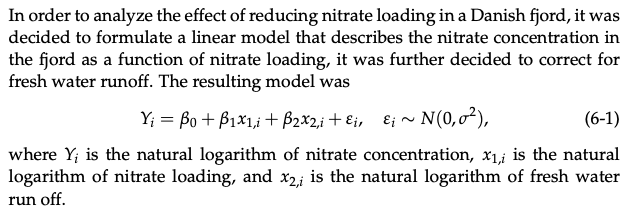

### **a) Statements**

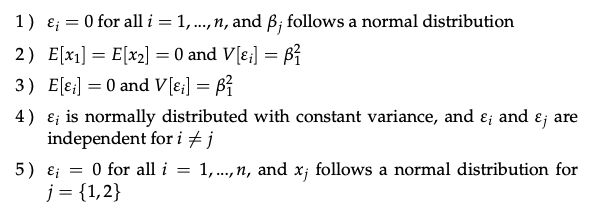

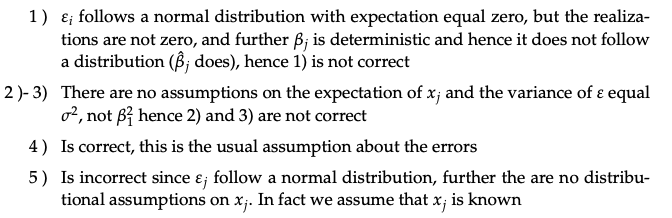

### **b) What are the parameter estimates for the model parameters ($β_i$ and $σ^2$) and how many degrees of freedom are there in the estimation?**

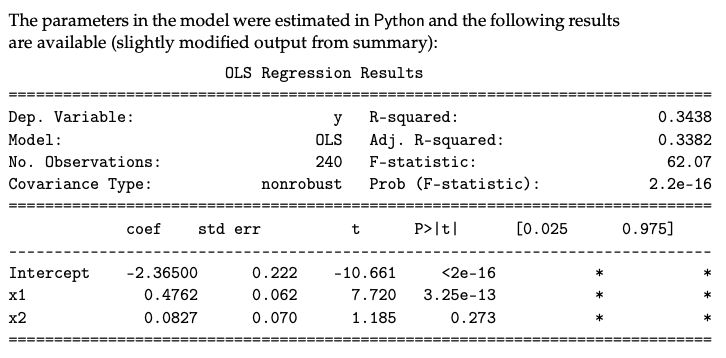

In [2]:
# The parameters are:
beta0 = -2.36500
beta0_err = 0.22184

beta1 = 0.47621
beta1_err = 0.06169

beta2 = 0.08269
beta2_err = 0.06977

# And the error variance is:
residual_var = 0.3064 ** 2

print("beta0:", beta0)
print("beta0_err:", beta0_err)
print("\nbeta1:", beta1)
print("beta1_err:", beta1_err)
print("\nbeta2:", beta2)
print("beta2_err:", beta2_err)
print("\nResidual var", residual_var)

beta0: -2.365
beta0_err: 0.22184

beta1: 0.47621
beta1_err: 0.06169

beta2: 0.08269
beta2_err: 0.06977

Residual var 0.09388096


The parameters are:

**$$\beta_0 = -2.365$$**
**$$\beta_{0\_err} = 0.22184$$**

**$$\beta_1 = 0.47621$$**
**$$\beta_{1\_err} = 0.06169$$**

**$$\beta_2 = 0.08269$$**
**$$\beta_{2\_err} = 0.06977$$**

**Residual variance**: $$\sigma^2 = 0.09388096$$

### **c) Calculate the usual 95% confidence intervals for the parameters ($β_0$, $β_1$, and $β_2$)**

In [3]:


#degrees of freedom is df = n-(p+1), so we have:
n = 240
df = n-(2+1)
t = stats.t.ppf(1-0.05/2, df)

# beta0
beta0_ci = [beta0 - t*beta0_err, beta0 + t*beta0_err]

# beta1
beta1_ci = [beta1 - t*beta1_err, beta1 + t*beta1_err]

# beta2
beta2_ci = [beta2 - t*beta2_err, beta2 + t*beta2_err]

#print with only 2 decimal places
print("Beta0 CI:", [round(x, 2) for x in beta0_ci])
print("\nBeta1 CI:", [round(x, 2) for x in beta1_ci])
print("\nBeta2 CI:", [round(x, 2) for x in beta2_ci])


Beta0 CI: [-2.8, -1.93]

Beta1 CI: [0.35, 0.6]

Beta2 CI: [-0.05, 0.22]


### **d) On level $α = 0.05$ which of the parameters are significantly different from 0, also find the p-values for the tests used for each of the parameters?**

From the p-values and the CI that contains 0, we can see that x2 is not significant.

## **Exercise 6.2 Multiple linear regression model**

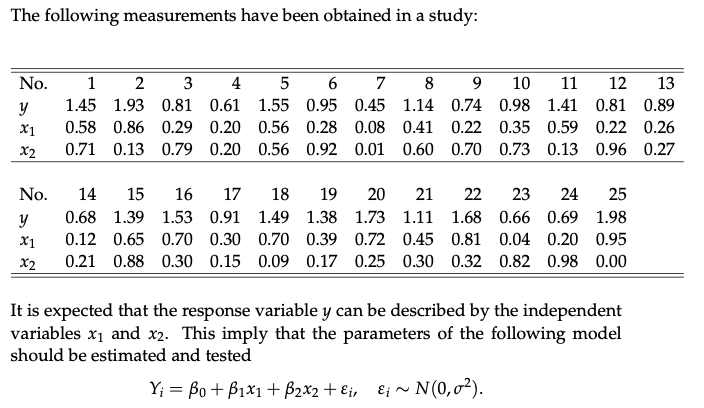

### **a) Calculate the parameter estimates and find the usual 95% confidence intervals for $β_0$, $β_1$, and $β_2$**

In [4]:
df = pd.DataFrame({
'x1': [0.58, 0.86, 0.29, 0.20, 0.56, 0.28, 0.08, 0.41, 0.22,
0.35, 0.59, 0.22, 0.26, 0.12, 0.65, 0.70, 0.30, 0.70,
0.39, 0.72, 0.45, 0.81, 0.04, 0.20, 0.95],
'x2': [0.71, 0.13, 0.79, 0.20, 0.56, 0.92, 0.01, 0.60, 0.70,
0.73, 0.13, 0.96, 0.27, 0.21, 0.88, 0.30, 0.15, 0.09,
0.17, 0.25, 0.30, 0.32, 0.82, 0.98, 0.00],
'y': [1.45, 1.93, 0.81, 0.61, 1.55, 0.95, 0.45, 1.14, 0.74,
0.98, 1.41, 0.81, 0.89, 0.68, 1.39, 1.53, 0.91, 1.49,
1.38, 1.73, 1.11, 1.68, 0.66, 0.69, 1.98]
})

In [5]:
fit = smf.ols('y ~ x1 + x2', data=df).fit()
print(fit.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
No. Observations:                  25   F-statistic:                     172.0
Covariance Type:            nonrobust   Prob (F-statistic):           3.70e-14
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4335      0.066      6.571      0.000       0.297       0.570
x1             1.6530      0.095     17.355      0.000       1.455       1.851
x2             0.0039      0.075      0.053      0.958      -0.151       0.159

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [6]:
# residual variance:
fit.mse_resid

0.012705227666532164

In [7]:
# confidence intervals for the coefficients:
fit.conf_int(alpha=0.05)

,0,1
Intercept,0.296707,0.570387
x1,1.455467,1.850520
x2,-0.151292,0.159182


### **b) Still using confidence level $α = 0.05$ reduce the model if appropriate.**

In [8]:
print(fit.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
No. Observations:                  25   F-statistic:                     172.0
Covariance Type:            nonrobust   Prob (F-statistic):           3.70e-14
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4335      0.066      6.571      0.000       0.297       0.570
x1             1.6530      0.095     17.355      0.000       1.455       1.851
x2             0.0039      0.075      0.053      0.958      -0.151       0.159

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


We can drop x2 since its not significant (p-value = 0.958 >> $\alpha = 0.05$)

In [9]:
fit2 = smf.ols('y ~ x1', data=df).fit()
print(fit2.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
No. Observations:                  25   F-statistic:                     359.6
Covariance Type:            nonrobust   Prob (F-statistic):           1.54e-15
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4361      0.044      9.913      0.000       0.345       0.527
x1             1.6512      0.087     18.963      0.000       1.471       1.831

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


Everything is significant now.

### **c) Carry out a residual analysis to check that the model assumptions are fulfilled**

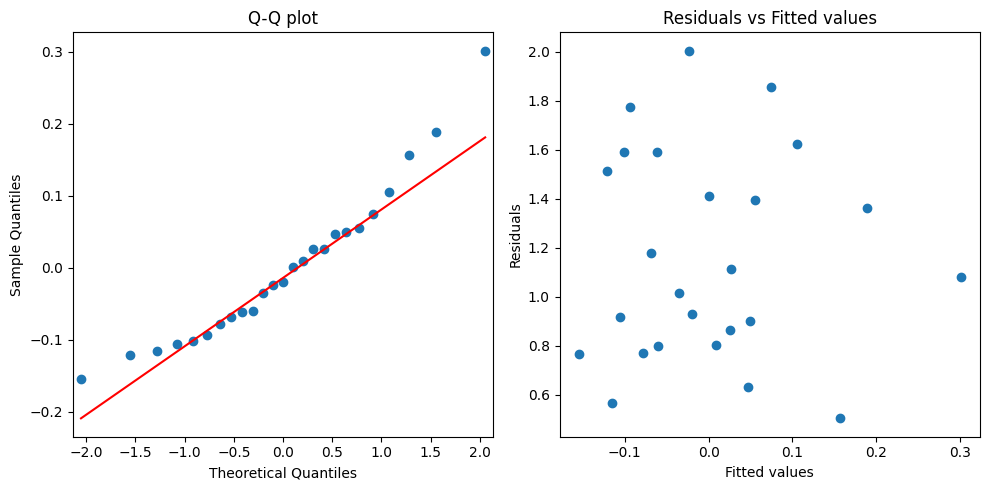

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sm.qqplot(fit.resid, line="q",a=1/2, ax=ax[0])
ax[0].set_title("Q-Q plot")
ax[1].scatter(fit.resid, fit.fittedvalues)
ax[1].set_xlabel("Fitted values")
ax[1].set_ylabel("Residuals")
ax[1].set_title("Residuals vs Fitted values")
plt.tight_layout()
plt.show()

#what is sm? 



There are no strong evidence against the assumptions, the qq-plot is are a straight
line and the are no obvious dependence between the residuals and the fitted values,
and we conclude that the assumptions are fulfilled.

### **d) Make a plot of the fitted line and 95% confidence and prediction intervals of the line for $x_1 ∈[0, 1]$**

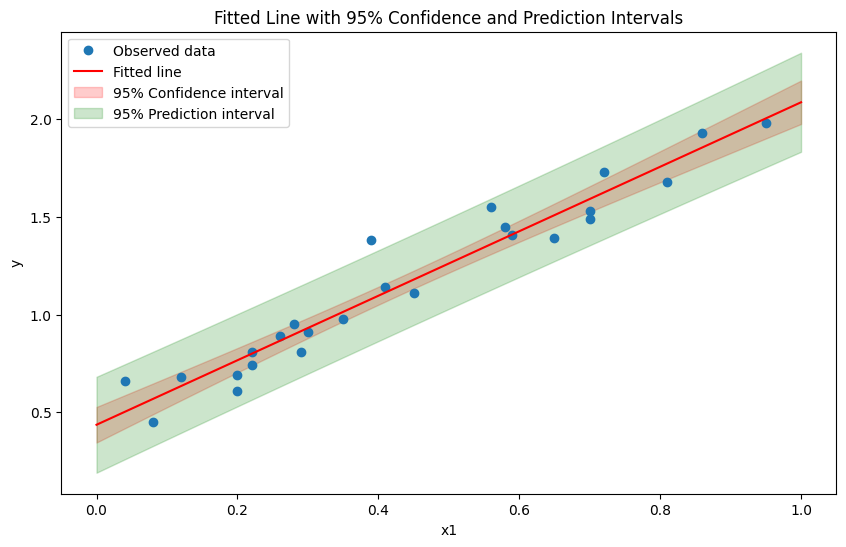

In [11]:
x1_new = pd.DataFrame({'x1': np.linspace(0, 1, 100)})

prediction_summary = fit2.get_prediction(x1_new).summary_frame(alpha=0.05)

plt.figure(figsize=(10, 6))

plt.plot(df['x1'], df['y'], 'o', label='Observed data')
plt.plot(x1_new, prediction_summary['mean'], 'r-', label='Fitted line')
plt.fill_between(x1_new['x1'],
                 prediction_summary['mean_ci_lower'],
                 prediction_summary['mean_ci_upper'],
                 color='red', alpha=0.2, label='95% Confidence interval')
plt.fill_between(x1_new['x1'],
                 prediction_summary['obs_ci_lower'],
                 prediction_summary['obs_ci_upper'],
                 color='green', alpha=0.2, label='95% Prediction interval')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.title('Fitted Line with 95% Confidence and Prediction Intervals')
plt.show()

- prediction intervals =  we predict the outcome of one single experiment(higher error)
- prediction intervals = angiver usikkerheden for en ny observation



- confidence intervals =  we predict the mean value of future outcomes.
- confidence intervals = angiver usikkerheden på regressionslinjen